In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use(['science'])
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['lines.linewidth'] = 2.2

In [3]:
df_results_imagenet = pd.read_csv('../imagenet_n_iter_results_w_cvg.csv')
df_results_imagenet_train = pd.read_csv('../imagenet_n_iter_results_train.csv')
df_results_imagenet_train_loss = pd.read_csv('../imagenet_n_iter_results_train_loss.csv')
df_results_imagenet_loss = pd.read_csv('../imagenet_n_iter_results_loss.csv')
df_results_wikitext = pd.read_csv('../transformer_results_w_cvg.csv')
df_results_wikitext_anderson = pd.read_csv('../transformer_results_anderson.csv')
df_results_cityscapes = pd.read_csv('../cityscapes_n_iter_results_w_cvg.csv')
df_results_optical_flow = pd.read_csv('../optical_flow_results_w_cvg.csv')

In [4]:
df_results_imagenet.query('f_thres_val == 26')['top1'].mean()

79.03399658203125

In [5]:
df_results_imagenet_train.query('f_thres_val == 26')['top1'].mean()

90.46210479736328

In [6]:
df_results_imagenet_train_loss.query('f_thres_val == 26')['top1'].mean()

0.332526381489964

In [7]:
df_results_imagenet_loss.query('f_thres_val == 26')['top1'].mean()

0.848250369420927

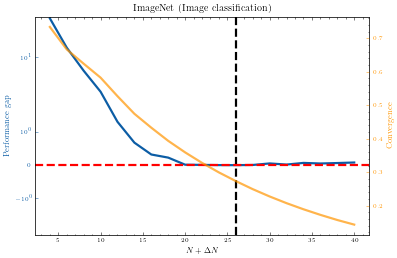

In [8]:
# imagenet plot
# we want to plot the top 1 accuracy vs the number of iterations
# and highlight that the model was trained with 26 iterations with a black dashed vertical line
# the top 1 accuracy of the model with 26 iterations should be subtracted from the other accuracies
def plot_imagenet_results(ax, train=False, loss=False):
    if train:
        if loss:
            df = df_results_imagenet_train_loss
        else:
            df = df_results_imagenet_train
    else:
        if loss:
            df = df_results_imagenet_loss
        else:
            df = df_results_imagenet
    accuracies = df['top1'].values
    n_iters = df['f_thres_val'].values
    n_iters = np.array([int(n) for n in n_iters])
    accuracy_at_26 = accuracies[n_iters == 26]
    if loss:
        accuracies = accuracies
        accuracy_at_26 = accuracy_at_26
    else:
        accuracies = 100 - accuracies
        accuracy_at_26 = 100 - accuracy_at_26
    ax.plot(n_iters, accuracies - accuracy_at_26, '-', color='C0')
    ax.axvline(x=26, color='k', linestyle='--')
    ax.set_yscale('symlog')
    ax.axhline(y=0, color='r', linestyle='--')
    # ax.axhline(y=accuracy_at_26, color='r', linestyle='--')
    ax.set_xlabel(r"$N + \Delta N$")
    # ax.set_ylabel(r"$D(N, \Delta N)$")
    if loss:
        ax.set_ylabel(r"Loss decrease")
    else:
        ax.set_ylabel(r"Performance gap")
    ax.yaxis.label.set_color('C0')
    ax.tick_params(axis='y', colors='C0')
    if loss:
        if train:
            ax.set_title('ImageNet (Image classification) - Train set')
        else:
            ax.set_title('ImageNet (Image classification) - Test set')
    else:
        ax.set_title('ImageNet (Image classification)')
    # I also want to add the plot of convergence vs number of iterations
    # with an additional y axis on the right that represents cvg
    # cvg should be taken from cvg_rel
    cvg_rel = df['cvg_rel'].values
    ax2 = ax.twinx()
    ax2.plot(n_iters, cvg_rel, '-', color='C2', markersize=3, alpha=0.7)
    ax2.set_ylabel(r"Convergence")
    ax2.yaxis.label.set_color('C2')
    ax2.tick_params(axis='y', colors='C2')
    



plot_imagenet_results(plt.figure().add_subplot(111))

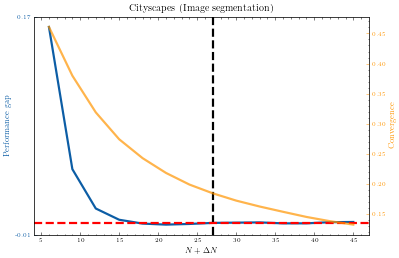

In [9]:
# cityscapes plot
def plot_cityscape_results(ax):
    mious = df_results_cityscapes['miou'].values
    n_iters = df_results_cityscapes['f_thres_val'].values
    n_iters = np.array([int(n) for n in n_iters])
    miou_at_27 = mious[n_iters == 27]
    mious = miou_at_27 - mious
    # mious = - mious
    ax.plot(n_iters, mious, '-')
    ax.axvline(x=27, color='k', linestyle='--')
    ax.set_yscale('symlog')
    ax.yaxis.set_major_formatter('{x:.2f}')
    # ax.axhline(y=-miou_at_27, color='r', linestyle='--')
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(r"$N + \Delta N$")
    # ax.set_ylabel(r"$D(N, \Delta N)$")
    ax.set_ylabel(r"Performance gap")
    ax.yaxis.label.set_color('C0')
    ax.tick_params(axis='y', colors='C0')
    ax.set_title('Cityscapes (Image segmentation)')
    # I also want to add the plot of convergence vs number of iterations
    # with an additional y axis on the right that represents cvg
    # cvg should be taken from cvg_rel
    cvg_rel = df_results_cityscapes['cvg_rel'].values
    ax2 = ax.twinx()
    ax2.plot(n_iters, cvg_rel, '-', color='C2', markersize=3, alpha=0.7)
    ax2.set_ylabel(r"Convergence")
    ax2.yaxis.label.set_color('C2')
    ax2.tick_params(axis='y', colors='C2')

plot_cityscape_results(plt.figure().add_subplot(111))

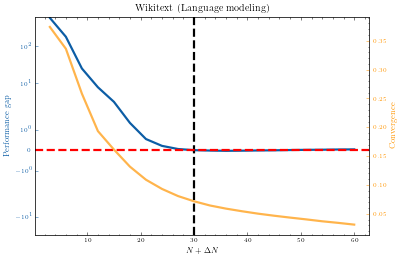

In [10]:
# wikitext plot
def plot_wikitext_results(ax):
    ppls = df_results_wikitext['val_ppl'].values
    n_iters = df_results_wikitext['n_forward'].values
    n_iters = np.array([int(n) for n in n_iters])
    ppl_at_30 = ppls[n_iters == 30]
    ppls = ppls - ppl_at_30
    ax.plot(n_iters, ppls, '-')
    ax.axvline(x=30, color='k', linestyle='--')
    ax.set_yscale('symlog')
    # ax.axhline(y=ppl_at_30, color='r', linestyle='--')
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(r"$N + \Delta N$")
    # ax.set_ylabel(r"$D(N, \Delta N)$")
    ax.set_ylabel(r"Performance gap")
    ax.yaxis.label.set_color('C0')
    ax.tick_params(axis='y', colors='C0')
    ax.set_title('Wikitext (Language modeling)')
    cvg_rel = df_results_wikitext['val_cvg_rel'].values
    ax2 = ax.twinx()
    ax2.plot(n_iters, cvg_rel, '-', color='C2', markersize=3, alpha=0.7)
    ax2.set_ylabel(r"Convergence")
    ax2.yaxis.label.set_color('C2')
    ax2.tick_params(axis='y', colors='C2')

plot_wikitext_results(plt.figure().add_subplot(111))

# ppls = df_results_wikitext['val_ppl'].values
# ppls_anderson = df_results_wikitext_anderson['val_ppl'].values
# n_iters = df_results_wikitext['n_forward'].values
# n_iters = np.array([int(n) for n in n_iters])
# ppl_at_30 = ppls[n_iters == 30]
# ppls = ppls - ppl_at_30
# ppls_anderson = ppls_anderson - ppl_at_30
# plt.plot(n_iters, ppls, 'o', label='broyden')
# plt.plot(n_iters, ppls_anderson, 'o', label='anderson')
# plt.axvline(x=30, color='k', linestyle='--')
# plt.yscale('symlog')
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel(r"$N + \Delta N$")
# plt.ylabel('perplexity at n iterations - perplexity at 30 iterations')
# plt.title('relative error vs number of iterations for wikitext\n DEQ-Tformer trained w Broyden')
# plt.legend()

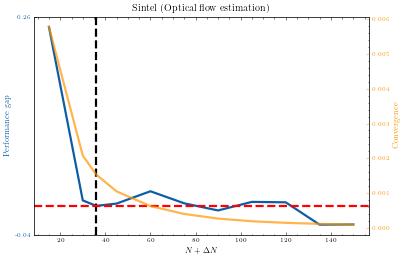

In [11]:
# sintel plot
# we want to plot the perf vs the number of iterations
# and highlight that the model was trained with 36 iterations with a black dashed vertical line
# the perf of the model with 36 iterations should be subtracted from the other perfs
def plot_sintel_results(ax):
    # sort optical flow results by f_thres_val
    df_results_optical_flow_ = df_results_optical_flow.sort_values(by=['f_thres_val'])
    perfs = df_results_optical_flow_.query("dataset == 'sintel' & solver == 'broyden'")['perf'].values
    n_iters = df_results_optical_flow_.query("dataset == 'sintel' & solver == 'broyden'")['f_thres_val'].values
    n_iters = np.array([int(n) for n in n_iters])
    perf_at_36 = perfs[n_iters == 36]
    perfs = perfs - perf_at_36
    ax.plot(n_iters, perfs, '-')
    ax.axvline(x=36, color='k', linestyle='--')
    ax.set_yscale('symlog')
    ax.yaxis.set_major_formatter('{x:.2f}')
    # ax.axhline(y=perf_at_36, color='r', linestyle='--')
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(r"$N + \Delta N$")
    # ax.set_ylabel(r"$D(N, \Delta N)$")
    ax.set_ylabel(r"Performance gap")
    ax.yaxis.label.set_color('C0')
    ax.tick_params(axis='y', colors='C0')
    ax.set_title('Sintel (Optical flow estimation)')
    cvg_rel = df_results_optical_flow_['cvg_rel'].values
    ax2 = ax.twinx()
    ax2.plot(n_iters, cvg_rel, '-', color='C2', markersize=3, alpha=0.7)
    ax2.set_ylabel(r"Convergence")
    ax2.yaxis.label.set_color('C2')
    ax2.tick_params(axis='y', colors='C2')

plot_sintel_results(plt.figure().add_subplot(111))

/tmp/ipykernel_423387/1000390123.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


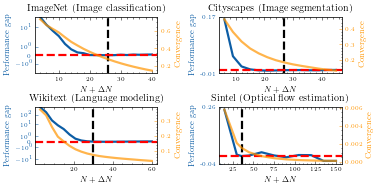

In [21]:
#General figure
# This figure is basically a single figure with all the plots above
# It is useful for the paper
fig, axs = plt.subplots(2, 2, figsize=(5.5, 2.7), gridspec_kw={'hspace': 0.6, 'wspace': 0.5})
plot_imagenet_results(axs[0, 0])
plot_cityscape_results(axs[0, 1])
plot_wikitext_results(axs[1, 0])
plot_sintel_results(axs[1, 1])
plt.tight_layout()
plt.savefig('relative_error_vs_n_iters.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

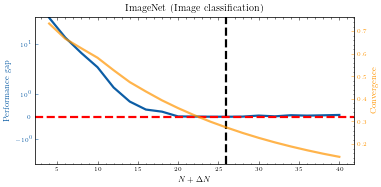

In [13]:
plot_imagenet_results(plt.figure(figsize=(5.5, 2.8)).add_subplot(111))
plt.tight_layout()
plt.savefig('relative_error_vs_n_iters_imagenet_train.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

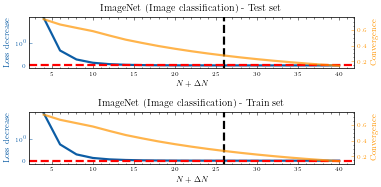

In [14]:
#General figure
# This figure is basically a single figure with all the plots above
# It is useful for the paper
fig, axs = plt.subplots(2, 1, figsize=(5.5, 2.8))
plot_imagenet_results(axs[0], train=False, loss=True)
plot_imagenet_results(axs[1], train=True, loss=True)
plt.tight_layout()
plt.savefig('relative_error_vs_n_iters_loss_imagenet.pdf', bbox_inches='tight', pad_inches=0, dpi=300)